7.5 Estimating a vector with unknown measurement nonlinearity

In [3]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [1]:
n = 4
m = 300
sigma = 1.000000e-01
alpha = 0.040
beta = 1.000

In [4]:
A =np.array([[-2.054 , 1.393 , -2.644 , -0.979] ,
    [-0.321 , 1.622 , -0.773 , -2.534] ,
    [-0.645 , 0.221 , -1.954 , -1.614] ,
    [0.036 , -0.236 , -0.598 , -3.029] ,
    [-1.217 , 1.536 , -0.870 , -0.893] ,
    [-1.874 , -0.909 , -1.701 , -1.189] ,
    [-0.783 , 1.002 , 0.165 , -2.557] ,
    [-0.523 , 1.578 , -1.110 , -0.801] ,
    [-0.990 , -0.209 , -1.723 , -0.911] ,
    [-0.519 , 0.180 , -1.819 , -0.744] ,
    [-1.146 , 1.184 , 0.443 , -2.237] ,
    [-0.832 , 0.009 , -0.816 , -1.619] ,
    [0.799 , 2.373 , -1.023 , -0.871] ,
    [-1.381 , 0.367 , 0.294 , -2.178] ,
    [-0.182 , 0.766 , -0.686 , -1.298] ,
    [-2.005 , 0.248 , -2.123 , 0.730] ,
    [-0.275 , -1.489 , -0.901 , -2.334] ,
    [-0.368 , 0.944 , -0.975 , -0.767] ,
    [0.212 , 0.702 , -0.711 , -1.414] ,
    [-1.213 , 0.391 , -1.228 , -0.378] ,
    [-0.947 , 0.672 , -0.243 , -1.227] ,
    [-1.234 , 1.254 , 0.959 , -2.089] ,
    [-0.157 , -0.591 , -2.248 , -0.223] ,
    [0.462 , 1.738 , -0.733 , -0.849] ,
    [-1.664 , 0.028 , 0.172 , -1.388] ,
    [-1.018 , 0.083 , -1.372 , -0.252] ,
    [-0.211 , -0.279 , -2.025 , -0.206] ,
    [-0.992 , -0.267 , -1.132 , -0.522] ,
    [1.237 , 0.626 , 0.152 , -2.379] ,
    [-1.475 , -0.214 , 0.702 , -2.105] ,
    [0.668 , 0.227 , -1.025 , -1.150] ,
    [-0.340 , 0.103 , -1.490 , -0.266] ,
    [-0.742 , 1.107 , -0.680 , -0.291] ,
    [0.986 , 1.373 , 0.287 , -2.065] ,
    [-0.390 , -0.815 , -1.443 , -0.491] ,
    [0.708 , 0.140 , -0.293 , -1.779] ,
    [-1.604 , -0.655 , -0.511 , -0.853] ,
    [-0.904 , 0.139 , 0.235 , -1.550] ,
    [-0.922 , -0.175 , -0.131 , -1.248] ,
    [-1.271 , -0.277 , 0.554 , -1.816] ,
    [1.553 , 1.537 , -1.130 , -0.735] ,
    [-1.202 , 0.473 , 0.102 , -0.748] ,
    [-0.704 , -0.293 , -0.288 , -1.057] ,
    [0.569 , -1.003 , -0.608 , -1.758] ,
    [0.712 , 0.327 , -0.685 , -1.078] ,
    [0.010 , 0.500 , 0.339 , -1.664] ,
    [-1.201 , -0.168 , -0.944 , -0.128] ,
    [-0.712 , -1.391 , -2.277 , 0.285] ,
    [-1.292 , 1.870 , 0.053 , 0.291] ,
    [0.816 , 1.310 , -0.527 , -0.701] ,
    [-0.644 , 0.041 , -0.953 , 0.070] ,
    [0.690 , 0.636 , 0.075 , -1.590] ,
    [0.569 , 1.736 , -0.316 , -0.314] ,
    [-0.116 , -1.108 , -1.729 , -0.080] ,
    [-0.011 , 0.330 , 0.339 , -1.333] ,
    [-0.073 , -1.209 , 0.162 , -1.910] ,
    [0.175 , 0.314 , -1.288 , 0.207] ,
    [0.238 , -0.488 , -1.170 , -0.384] ,
    [0.806 , -1.374 , -0.909 , -1.504] ,
    [-1.357 , -0.203 , -1.341 , 0.589] ,
    [0.428 , -0.413 , -1.034 , -0.775] ,
    [0.529 , -0.500 , -1.603 , -0.278] ,
    [-0.645 , 0.065 , 0.620 , -1.643] ,
    [-0.133 , 0.559 , 0.588 , -1.358] ,
    [-0.005 , -1.499 , -1.713 , -0.191] ,
    [-0.038 , -0.716 , 0.202 , -1.615] ,
    [0.327 , -0.542 , -1.573 , 0.176] ,
    [1.479 , -1.345 , -2.064 , -0.398] ,
    [1.138 , 1.482 , 0.111 , -1.161] ,
    [1.213 , -0.605 , -1.665 , -0.144] ,
    [0.315 , -0.572 , 0.128 , -1.556] ,
    [1.082 , -1.228 , -1.726 , -0.301] ,
    [0.990 , 0.667 , -0.926 , -0.266] ,
    [-0.258 , 0.290 , -0.222 , -0.642] ,
    [-1.008 , 1.862 , 1.065 , -0.458] ,
    [-0.560 , -1.707 , -0.860 , -0.737] ,
    [-1.441 , -1.751 , -0.159 , -1.013] ,
    [-0.048 , 1.084 , -0.502 , 0.228] ,
    [-0.601 , 0.612 , -0.692 , 0.120] ,
    [-0.187 , 0.107 , -0.953 , 0.221] ,
    [-0.461 , -2.306 , 0.362 , -2.238] ,
    [0.021 , 0.825 , -0.072 , -0.553] ,
    [0.290 , 0.376 , -0.600 , -0.359] ,
    [0.728 , 0.058 , 0.020 , -1.268] ,
    [0.714 , -0.721 , -0.937 , -0.737] ,
    [-1.128 , -1.917 , -0.511 , -0.746] ,
    [-0.805 , -0.330 , -0.037 , -0.683] ,
    [-0.256 , 1.937 , 0.978 , -0.602] ,
    [-0.631 , 0.092 , -0.337 , -0.346] ,
    [-1.232 , -0.461 , -0.107 , -0.408] ,
    [-0.001 , 0.599 , 0.290 , -0.724] ,
    [0.219 , -1.393 , -0.112 , -1.567] ,
    [0.726 , 1.848 , 0.778 , -1.006] ,
    [-1.319 , 0.020 , -0.275 , 0.003] ,
    [-0.696 , 0.679 , 1.107 , -1.404] ,
    [-2.171 , -0.957 , 0.485 , -0.598] ,
    [-1.594 , 0.622 , 0.105 , 0.380] ,
    [0.380 , -0.756 , 0.234 , -1.500] ,
    [1.278 , 0.926 , -0.090 , -0.924] ,
    [-1.140 , -0.221 , 0.314 , -0.417] ,
    [-0.402 , 0.892 , -0.150 , -0.073] ,
    [-0.580 , 0.313 , -1.356 , 1.048] ,
    [0.944 , 1.751 , 0.399 , -0.720] ,
    [1.064 , -0.026 , -0.417 , -0.801] ,
    [-0.351 , -0.447 , -0.239 , -0.426] ,
    [-0.234 , -0.199 , -0.231 , -0.361] ,
    [1.189 , 0.536 , -1.074 , -0.002] ,
    [1.472 , 0.625 , -0.522 , -0.533] ,
    [-0.588 , -0.275 , -0.006 , -0.453] ,
    [0.587 , 1.259 , 0.406 , -0.535] ,
    [-1.107 , 0.932 , 0.700 , -0.299] ,
    [-2.202 , 0.279 , -0.832 , 1.599] ,
    [1.276 , 0.553 , -1.610 , 0.700] ,
    [-0.318 , -0.688 , 0.039 , -0.665] ,
    [-0.131 , -0.670 , 0.813 , -1.589] ,
    [-0.059 , 1.293 , 0.599 , -0.482] ,
    [-0.808 , 0.795 , 0.965 , -0.727] ,
    [-1.186 , 0.856 , 0.923 , -0.302] ,
    [-0.400 , 0.811 , -0.195 , 0.442] ,
    [-0.635 , 0.393 , 0.139 , -0.126] ,
    [0.262 , -1.301 , -0.803 , -0.395] ,
    [-0.079 , 0.229 , 0.411 , -0.703] ,
    [-2.325 , -0.808 , 0.971 , -0.611] ,
    [1.415 , 0.379 , 0.179 , -1.133] ,
    [0.578 , 0.081 , 0.432 , -1.052] ,
    [-0.548 , -0.249 , 0.289 , -0.650] ,
    [0.444 , 0.228 , -0.752 , 0.214] ,
    [-0.429 , 0.585 , -0.990 , 1.356] ,
    [-1.188 , -0.072 , -0.373 , 0.716] ,
    [-1.175 , 0.240 , 0.228 , 0.078] ,
    [-0.249 , 0.147 , 0.662 , -0.664] ,
    [0.129 , 1.381 , 0.533 , -0.151] ,
    [0.174 , 1.578 , -0.505 , 0.939] ,
    [0.953 , 0.639 , -0.830 , 0.321] ,
    [-1.056 , -0.048 , 0.369 , 0.110] ,
    [0.620 , -1.693 , -1.467 , 0.129] ,
    [0.371 , -0.224 , 0.687 , -1.372] ,
    [0.397 , -0.101 , -0.581 , 0.198] ,
    [-0.113 , -0.375 , -0.475 , 0.227] ,
    [0.591 , 0.808 , -0.382 , 0.327] ,
    [-0.347 , -1.158 , -0.064 , -0.443] ,
    [0.535 , -0.359 , 0.419 , -1.009] ,
    [-1.116 , -0.065 , 0.343 , 0.218] ,
    [1.340 , 0.756 , 1.263 , -1.631] ,
    [-1.119 , 0.149 , -0.179 , 0.860] ,
    [0.680 , -0.785 , 0.818 , -1.491] ,
    [-0.020 , 0.117 , -0.041 , 0.229] ,
    [-0.096 , -0.186 , -0.167 , 0.138] ,
    [-0.854 , -0.184 , -0.983 , 1.279] ,
    [0.623 , 1.082 , -0.089 , 0.494] ,
    [0.677 , -1.125 , 0.030 , -0.798] ,
    [-0.950 , 0.686 , 1.230 , -0.401] ,
    [-0.606 , -0.146 , 0.384 , -0.050] ,
    [-0.374 , -0.508 , 0.173 , -0.190] ,
    [0.327 , -0.656 , 0.763 , -1.229] ,
    [-0.136 , 1.509 , 1.364 , -0.462] ,
    [-0.704 , -0.888 , 0.062 , -0.142] ,
    [-1.056 , 0.269 , -0.179 , 0.957] ,
    [-1.021 , -0.351 , -1.430 , 1.958] ,
    [-0.684 , 0.033 , 1.488 , -1.110] ,
    [-0.847 , -2.379 , 0.508 , -1.044] ,
    [-0.465 , -2.424 , -0.607 , -0.258] ,
    [-0.546 , -0.964 , 0.755 , -0.908] ,
    [0.071 , -0.517 , 0.883 , -1.091] ,
    [-0.692 , -0.020 , 1.682 , -1.384] ,
    [0.000 , -0.981 , 0.723 , -1.008] ,
    [0.294 , 0.837 , 2.094 , -1.647] ,
    [-1.168 , -0.909 , -1.052 , 1.344] ,
    [-0.013 , -1.258 , 0.806 , -1.335] ,
    [-0.262 , 1.789 , -0.037 , 1.293] ,
    [0.889 , 1.216 , 0.589 , -0.283] ,
    [-1.009 , -0.089 , 1.235 , -0.418] ,
    [-1.336 , -0.722 , 0.080 , 0.429] ,
    [-0.628 , -0.075 , 0.021 , 0.541] ,
    [-0.264 , -2.635 , 0.888 , -1.795] ,
    [-0.493 , -0.077 , 0.285 , 0.294] ,
    [1.018 , -0.661 , -0.008 , -0.587] ,
    [0.011 , -1.535 , -1.084 , 0.582] ,
    [0.896 , -0.506 , -0.764 , 0.271] ,
    [-0.377 , 1.635 , 0.018 , 1.259] ,
    [-0.245 , -1.111 , -0.615 , 0.309] ,
    [-1.011 , 0.441 , -0.086 , 0.983] ,
    [-2.365 , -1.263 , 0.037 , 0.870] ,
    [-0.038 , 0.327 , -0.998 , 1.495] ,
    [-0.079 , -0.384 , 0.775 , -0.517] ,
    [0.118 , 0.307 , -0.114 , 0.554] ,
    [0.505 , -0.454 , -0.896 , 0.581] ,
    [-0.020 , -2.009 , -0.579 , -0.021] ,
    [1.444 , -0.978 , -0.799 , -0.207] ,
    [0.571 , 0.697 , 0.871 , -0.347] ,
    [0.008 , 0.555 , 0.245 , 0.659] ,
    [-0.078 , 0.997 , 0.205 , 0.887] ,
    [-0.941 , 0.580 , 1.317 , -0.049] ,
    [0.317 , -0.559 , 0.284 , -0.192] ,
    [-1.664 , -1.294 , -0.415 , 1.108] ,
    [-0.541 , -0.072 , 0.199 , 0.559] ,
    [-2.120 , 0.753 , 1.116 , 0.758] ,
    [0.316 , -0.586 , -0.140 , 0.237] ,
    [-0.844 , -0.767 , 0.174 , 0.665] ,
    [0.379 , -0.471 , 0.069 , 0.208] ,
    [-0.120 , -0.117 , -0.013 , 0.613] ,
    [0.040 , -1.081 , -0.444 , 0.626] ,
    [-1.518 , 0.751 , 0.721 , 1.052] ,
    [1.038 , -1.126 , -1.634 , 1.348] ,
    [0.103 , -0.331 , 0.385 , -0.008] ,
    [0.913 , -0.336 , -0.851 , 1.009] ,
    [-0.595 , -0.705 , 0.812 , -0.374] ,
    [1.535 , -0.959 , -1.307 , 0.563] ,
    [2.136 , 2.690 , 0.121 , 0.863] ,
    [1.227 , 0.863 , 0.291 , 0.236] ,
    [-0.041 , 0.434 , 0.808 , 0.279] ,
    [0.125 , -0.139 , 1.384 , -0.694] ,
    [0.056 , 0.541 , 0.812 , 0.214] ,
    [-1.347 , 0.745 , 0.500 , 1.164] ,
    [0.469 , -0.890 , -0.511 , 0.659] ,
    [-0.261 , 1.274 , 0.848 , 0.574] ,
    [0.288 , -1.163 , -0.758 , 0.834] ,
    [0.086 , -0.146 , 0.900 , -0.339] ,
    [-1.100 , -0.662 , -1.073 , 2.080] ,
    [-0.246 , -0.838 , 0.132 , 0.374] ,
    [0.669 , -0.149 , -1.188 , 1.729] ,
    [1.056 , -1.406 , 1.013 , -1.416] ,
    [-0.266 , -1.054 , 0.217 , 0.327] ,
    [0.133 , 0.652 , 0.285 , 1.008] ,
    [-1.029 , -0.876 , 0.849 , 0.198] ,
    [0.232 , -0.839 , -0.006 , 0.574] ,
    [0.498 , -0.107 , 0.882 , -0.275] ,
    [0.219 , -0.036 , 0.339 , 0.655] ,
    [0.500 , -0.753 , -0.146 , 0.463] ,
    [0.656 , 1.320 , 1.033 , 0.316] ,
    [-1.666 , 0.135 , 1.552 , 0.565] ,
    [-1.334 , -2.415 , 0.258 , 0.478] ,
    [0.056 , -1.047 , 1.432 , -0.901] ,
    [0.257 , -1.081 , 0.249 , 0.346] ,
    [-1.257 , -0.328 , 1.322 , 0.366] ,
    [-1.410 , -1.423 , 0.572 , 0.660] ,
    [0.941 , 0.229 , 0.938 , 0.080] ,
    [1.521 , 2.237 , 0.332 , 1.233] ,
    [1.190 , -0.734 , 0.529 , -0.174] ,
    [-0.276 , -0.050 , 1.537 , -0.079] ,
    [1.488 , -0.977 , 0.182 , -0.023] ,
    [1.067 , -1.681 , -0.787 , 0.799] ,
    [-1.349 , 0.470 , 0.744 , 1.603] ,
    [2.112 , -0.425 , 1.064 , -0.895] ,
    [1.863 , 0.083 , 1.110 , -0.797] ,
    [0.485 , -0.570 , 0.760 , 0.256] ,
    [-0.331 , -0.783 , -0.027 , 1.315] ,
    [0.114 , -1.945 , 0.482 , 0.033] ,
    [0.931 , -0.406 , -0.160 , 0.885] ,
    [0.858 , 0.279 , 0.594 , 0.460] ,
    [-1.580 , 0.249 , 0.858 , 1.574] ,
    [0.663 , 0.257 , 0.280 , 0.902] ,
    [1.254 , 1.058 , 0.790 , 0.629] ,
    [1.270 , 0.719 , 1.395 , 0.017] ,
    [1.770 , 0.247 , -0.300 , 1.294] ,
    [1.290 , -0.673 , -0.268 , 1.002] ,
    [0.485 , -0.501 , -0.895 , 2.266] ,
    [0.614 , 1.281 , 0.325 , 1.762] ,
    [-0.433 , -0.896 , 1.142 , 0.441] ,
    [0.059 , -0.574 , 0.752 , 0.897] ,
    [0.508 , -0.498 , -0.335 , 1.427] ,
    [1.957 , -1.863 , -0.583 , 0.448] ,
    [0.525 , 0.912 , 2.495 , -0.365] ,
    [-0.150 , 0.508 , 0.110 , 2.238] ,
    [0.261 , -0.150 , 1.165 , 0.623] ,
    [1.095 , 1.339 , 1.541 , 0.558] ,
    [1.692 , -1.119 , -0.322 , 0.912] ,
    [0.234 , 1.634 , 2.016 , 0.528] ,
    [0.781 , -0.637 , 1.151 , 0.065] ,
    [0.056 , -1.008 , 0.685 , 1.050] ,
    [0.088 , 0.388 , 0.672 , 1.324] ,
    [2.183 , 2.213 , 0.524 , 1.399] ,
    [0.390 , 1.341 , 1.442 , 1.094] ,
    [2.309 , -0.543 , -0.264 , 1.035] ,
    [1.624 , -0.201 , 0.636 , 0.565] ,
    [-1.004 , 0.231 , 2.629 , 0.298] ,
    [-0.822 , -0.186 , 0.806 , 1.687] ,
    [-0.065 , 0.168 , 0.354 , 1.957] ,
    [-0.296 , -1.256 , 0.818 , 0.858] ,
    [-1.025 , 0.055 , 1.232 , 1.584] ,
    [1.593 , -0.377 , 0.826 , 0.158] ,
    [0.281 , -0.987 , 0.457 , 1.113] ,
    [-0.682 , -0.528 , 1.306 , 1.228] ,
    [0.326 , -1.436 , 1.134 , 0.315] ,
    [0.551 , -1.324 , 0.680 , 0.651] ,
    [-0.204 , -0.144 , 0.771 , 1.582] ,
    [0.480 , -0.314 , 1.448 , 0.439] ,
    [-0.012 , -0.172 , 0.856 , 1.342] ,
    [1.073 , -0.694 , 2.081 , -0.679] ,
    [1.865 , -0.652 , 0.249 , 0.857] ,
    [-1.023 , -1.513 , 0.480 , 1.843] ,
    [1.191 , -0.015 , 0.911 , 1.098] ,
    [0.243 , -0.265 , 0.964 , 1.469] ,
    [1.191 , -2.449 , 0.249 , 0.709] ,
    [-0.435 , -0.421 , 2.732 , -0.160] ,
    [0.289 , -2.520 , -1.655 , 2.950] ,
    [0.731 , 1.620 , 2.176 , 1.535] ,
    [0.635 , -1.444 , 0.758 , 1.684] ,
    [0.553 , -2.078 , 1.191 , 0.908] ,
    [-0.251 , 0.044 , 1.216 , 3.203]])

y = np.array([-2.177 , -2.123 , -2.102 , -2.026 , -2.002 , -2.001 , -2.000 , -1.963 , -1.943 , -1.919 , -1.908 , -1.894 , -1.866 , -1.844 , -1.819 , -1.806 , -1.784 , -1.778 , -1.766 , -1.747 , -1.731 , -1.730 , -1.722 , -1.715 , -1.647 , -1.636 , -1.627 , -1.605 , -1.598 , -1.598 , -1.589 , -1.580 , -1.563 , -1.536 , -1.531 , -1.506 , -1.500 , -1.497 , -1.462 , -1.459 , -1.427 , -1.399 , -1.384 , -1.370 , -1.365 , -1.322 , -1.314 , -1.303 , -1.291 , -1.258 , -1.256 , -1.253 , -1.208 , -1.191 , -1.175 , -1.162 , -1.156 , -1.152 , -1.140 , -1.121 , -1.121 , -1.112 , -1.106 , -1.066 , -1.063 , -1.061 , -1.054 , -1.027 , -1.008 , -0.983 , -0.971 , -0.960 , -0.957 , -0.943 , -0.939 , -0.923 , -0.922 , -0.913 , -0.909 , -0.909 , -0.907 , -0.906 , -0.897 , -0.891 , -0.887 , -0.876 , -0.867 , -0.864 , -0.860 , -0.844 , -0.843 , -0.832 , -0.799 , -0.784 , -0.779 , -0.742 , -0.731 , -0.725 , -0.714 , -0.700 , -0.691 , -0.660 , -0.657 , -0.625 , -0.621 , -0.596 , -0.587 , -0.583 , -0.580 , -0.561 , -0.557 , -0.524 , -0.523 , -0.520 , -0.507 , -0.480 , -0.478 , -0.469 , -0.456 , -0.444 , -0.419 , -0.403 , -0.371 , -0.363 , -0.351 , -0.335 , -0.323 , -0.307 , -0.290 , -0.241 , -0.207 , -0.170 , -0.163 , -0.158 , -0.149 , -0.146 , -0.146 , -0.125 , -0.124 , -0.121 , -0.096 , -0.081 , -0.043 , -0.041 , -0.026 , -0.023 , 0.002 , 0.006 , 0.033 , 0.033 , 0.039 , 0.054 , 0.071 , 0.071 , 0.090 , 0.091 , 0.104 , 0.105 , 0.115 , 0.117 , 0.118 , 0.119 , 0.121 , 0.126 , 0.130 , 0.138 , 0.146 , 0.148 , 0.150 , 0.150 , 0.150 , 0.168 , 0.185 , 0.190 , 0.194 , 0.236 , 0.242 , 0.243 , 0.250 , 0.263 , 0.268 , 0.279 , 0.296 , 0.314 , 0.317 , 0.345 , 0.366 , 0.381 , 0.389 , 0.399 , 0.417 , 0.505 , 0.513 , 0.514 , 0.527 , 0.537 , 0.555 , 0.582 , 0.585 , 0.627 , 0.640 , 0.646 , 0.651 , 0.664 , 0.675 , 0.679 , 0.684 , 0.688 , 0.704 , 0.706 , 0.719 , 0.720 , 0.729 , 0.735 , 0.747 , 0.757 , 0.766 , 0.772 , 0.777 , 0.786 , 0.821 , 0.826 , 0.831 , 0.910 , 0.911 , 0.977 , 0.991 , 0.995 , 0.999 , 1.017 , 1.032 , 1.047 , 1.085 , 1.160 , 1.168 , 1.170 , 1.181 , 1.196 , 1.230 , 1.245 , 1.251 , 1.265 , 1.277 , 1.278 , 1.281 , 1.283 , 1.295 , 1.309 , 1.322 , 1.335 , 1.336 , 1.342 , 1.363 , 1.393 , 1.398 , 1.418 , 1.462 , 1.490 , 1.492 , 1.513 , 1.527 , 1.529 , 1.531 , 1.533 , 1.568 , 1.573 , 1.581 , 1.604 , 1.618 , 1.627 , 1.631 , 1.637 , 1.662 , 1.663 , 1.664 , 1.664 , 1.678 , 1.678 , 1.693 , 1.701 , 1.703 , 1.706 , 1.709 , 1.718 , 1.726 , 1.737 , 1.743 , 1.750 , 1.756 , 1.771 , 1.804 , 1.816 , 1.820 , 1.830 , 1.835 , 1.886 , 1.988 , 2.045 , 2.053 , 2.115])


In [6]:
x = cp.Variable(n)
z = cp.Variable(m)
# minimize the negative log likelihood
objective = cp.Minimize(cp.sum_squares(A @ x - z))
constraints = []
for i in range(m-1):
    constraints.append(z[i+1]-z[i] <= (y[i+1]-y[i]) / alpha)
    constraints.append(z[i+1]-z[i] >= (y[i+1]-y[i]) / beta)
prob = cp.Problem(objective, constraints)
result = prob.solve()

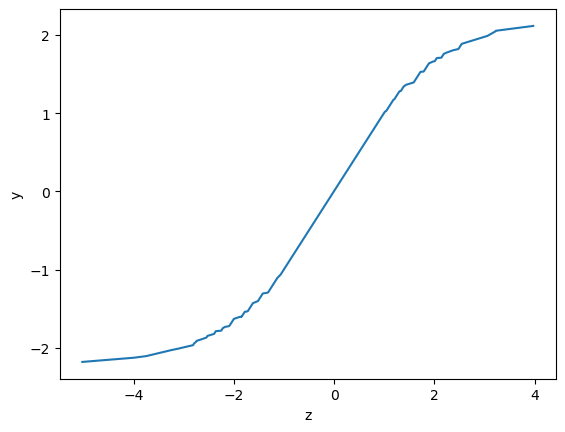

In [8]:
plt.plot(z.value, y)
plt.xlabel('z')
plt.ylabel('y')
plt.show()